In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math

In [2]:
%%latex
\begin{enumerate}
\item Define the function that you want to fit to the data.
\item Modify the  variable to the number of parameters in your function.nvar
\item Update the  variable to contain the initial guess for the parameter values.var
\item Modify the  function to use your function and calculate the likelihood of the predicted values given the actual values.myFunction()
\item Run the  function with your updated function and parameters.minimize()
\end{enumerate}

<IPython.core.display.Latex object>

In [3]:
# Define the f function
def f(x, a, b, c):
    return a * np.sin(b * x + c)

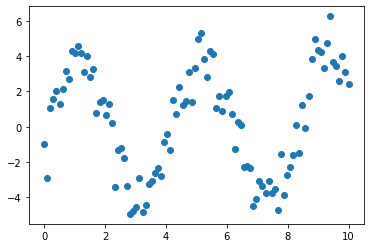

In [4]:
# Generate noisy data from the f function
x = np.linspace(0.0, 10.0, num=100)
a = 4.0
b = 1.5
c = 0.0
y = f(x, a, b, c)
noise = np.random.normal(0, 1., 100)
y = y + noise
# Plot the noisy data
plt.scatter(x, y)

In [5]:
# Define the log-likelihood function
def calcLogLikelihood(guess, true, n):
    error = true - guess
    sigma = np.std(error)
    f = ((1.0 / (2.0 * math.pi * sigma * sigma)) ** (n / 2)) * \
        np.exp(-1 * ((np.dot(error.T, error)) / (2 * sigma * sigma)))
    return np.log(f)

In [6]:
#   define my function which will return the objective function to be minimized
import math
def myFunction(var):
    #   load my  data
    #[x, y] = np.load('myData.npy')
    yGuess = f(x, var[0], var[1], var[2])
    fx = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*fx)

In [7]:
# Set the initial guess for the parameters
nvar = 3
var = np.zeros(nvar)
var[0] = 1.0
var[1] = 1.0
var[2] = 0.0

# Run the optimization
res = minimize(myFunction, var, method='BFGS', options={'disp': True})
res

Optimization terminated successfully.
         Current function value: 251.610053
         Iterations: 169
         Function evaluations: 940
         Gradient evaluations: 235


      fun: 251.6100532363487
 hess_inv: array([[ 2.54126820e+02, -9.49490732e-04, -4.59308410e-03],
       [-9.49490732e-04,  5.66964892e-06, -2.49923547e-05],
       [-4.59308410e-03, -2.49923547e-05,  1.85140756e-04]])
      jac: array([-1.90734863e-06,  3.81469727e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 940
      nit: 169
     njev: 235
   status: 0
  success: True
        x: array([3.42575601e+01, 1.25595848e-03, 5.34009032e-03])

In [8]:
#   perform least squares fit using scikitlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x.reshape(-1,1),y)
coefs = model.named_steps['linear'].coef_
coefs

array([ 2.56325835, -1.39976831,  0.14428073])

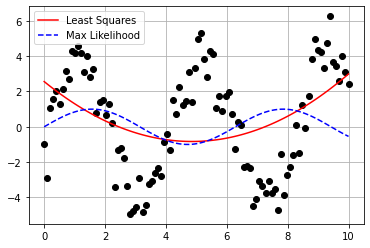

In [9]:
#   plot the data and model fits
plt.figure()
plt.plot(x,y, 'ok')
plt.plot(x,model.predict(x[:,np.newaxis]), '-r', label='Least Squares')
plt.plot(x,f(x, var[0], var[1], var[2]), '--b', label='Max Likelihood')
plt.grid(True)
plt.legend(loc=2)
plt.show()


In [16]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
xx = np.power(x,2)

X = np.c_[np.ones((n,1)), x, xx]


# OLS

In [17]:
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

Own inversion
[[ 2.56325835]
 [-1.39976831]
 [ 0.14428073]]
Eigenvalues of Hessian Matrix:[4.12466600e+03 1.98055138e-01 4.81270845e+00]


# Gradient with autograd

In [18]:
y = y.reshape(-1,1)
print(X.shape,y.shape)

(100, 3) (100, 1)


In [19]:
theta = np.random.randn(3,1)
eta = 1.0/np.max(EigValues)
Niterations = 100000
# define the gradient
training_gradient = grad(CostOLS)

In [20]:
for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

theta from own gd
[[ 2.53989003]
 [-1.39000149]
 [ 0.14345152]]


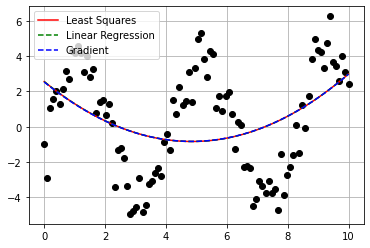

In [21]:
#   plot the data and model fits
plt.figure()
plt.plot(x,y, 'ok')
plt.plot(x,model.predict(x[:,np.newaxis]), '-r', label='Least Squares')
plt.plot(x,(theta_linreg[2]*(x**2)) + (theta_linreg[1]*x) + theta_linreg[0], '--g', label='Linear Regression')
plt.plot(x,(theta[2]*(x**2)) + (theta[1]*x) + theta[0], '--b', label='Gradient')
plt.grid(True)
plt.legend(loc=2)
plt.show()